In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import requests
import json
from bs4 import BeautifulSoup
from PIL import Image
from urllib.request import urlopen
from mplsoccer import Pitch, add_image, FontManager
import LanusStats as ls
sofascore = ls.SofaScore()
from urllib.error import HTTPError

DATOS QUE SE DEBEN EDITAR

In [2]:
url = 'https://www.sofascore.com/football/match/atletico-nacional-internacional/qOsgxc#id:13640309'
color_loc = 'red'
color_vis = 'green'

In [3]:
partido_sofascore = sofascore.get_match_data(url)

In [4]:
nombre_local, nombre_visit = sofascore.get_team_names(url)
nombre_local
nombre_visit

MatchDoesntHaveInfo: Match in path https://www.sofascore.com/football/match/atletico-nacional-internacional/qOsgxc#id:13640309 doesn't have enough information for this functions, try with another one.
El partido en el path https://www.sofascore.com/football/match/atletico-nacional-internacional/qOsgxc#id:13640309 no tiene la información para estas funciones, pruebe con otro.

SACAR MATCH MOMENTUM

In [ ]:
match_momentum= sofascore.get_match_momentum(url)
match_momentum

MatchDoesntHaveInfo: Match in path https://www.sofascore.com/football/match/atletico-nacional-internacional/qOsgxc#id:13640309 doesn't have enough information for this functions, try with another one.
El partido en el path https://www.sofascore.com/football/match/atletico-nacional-internacional/qOsgxc#id:13640309 no tiene la información para estas funciones, pruebe con otro.

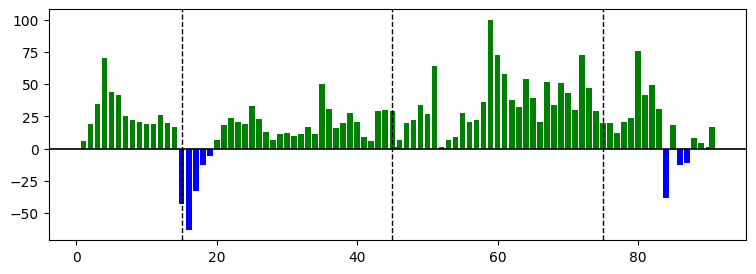

In [ ]:
fig, ax = plt.subplots(figsize=(9,3))
match_momentum_local = match_momentum[match_momentum['value'] > 0]
match_momentum_visit = match_momentum[match_momentum['value'] < 0]

plt.bar(match_momentum_local.minute, match_momentum_local.value, color=color_loc)
plt.bar(match_momentum_visit.minute, match_momentum_visit.value, color=color_vis)

# Líneas verticales punteadas para momentos clave (opcional, por ejemplo, minuto 45, etc.)
ax.axvline(x=45, color='black', linestyle='--', linewidth=1)
ax.axvline(x=15, color='black', linestyle='--', linewidth=1)
ax.axvline(x=75, color='black', linestyle='--', linewidth=1)

# Añadir la línea horizontal en el valor 0
ax.axhline(0, color='black', linewidth=1.2)


SACAR JUFADORES DESTACADOS

In [ ]:
df_local = sofascore.get_players_match_stats(url)[0]
df_visit = sofascore.get_players_match_stats(url)[1]

In [ ]:
df_local['percentage_pass'] = (df_local['accuratePass'] / df_local['totalPass']) * 100
df_visit['percentage_pass'] = (df_visit['accuratePass'] / df_visit['totalPass']) * 100

In [ ]:
df_filtrado = df_visit[['shortName','touches','totalPass','keyPass','percentage_pass']]

In [ ]:
lista_mayores = ['duelWon', 'touches', 'keyPass','percentage_pass']
nombre_mayores_local = []
valor_mayores_local = []
nombre_mayores_visit = []
valor_mayores_visit = []

for i in range(len(lista_mayores)):
    nombre = df_local.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][0]
    valor = df_local.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][1]
    nombre_mayores_local.append(nombre)
    valor_mayores_local.append(valor)

for i in range(len(lista_mayores)):
    nombre = df_visit.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][0]
    valor = df_visit.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][1]
    nombre_mayores_visit.append(nombre)
    valor_mayores_visit.append(valor)

nombre_mayores_local, valor_mayores_local

(['Jorman Campuzano', 'Jorman Campuzano', 'Jorman Campuzano', 'David Ospina'],
 [6.0, 104.0, 2.0, 100.0])

In [ ]:
nombre_mayores_visit, valor_mayores_visit

(['Ruyery Blanco',
  'Dairon Mosquera',
  'Jannenson Sarmiento',
  'Juan José Tello'],
 [10.0, 41.0, 1.0, 100.0])

In [ ]:
def sacar_spines(ax):
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

DATOS JUGADOR DESTACADO

In [ ]:
jugador_destacado_local = df_local[['name','rating']].sort_values(by='rating', ascending=False).iloc[0]['name']
jugador_destacado_visit = df_visit[['name','rating']].sort_values(by='rating', ascending=False).iloc[0]['name']
id_jug_local = df_local[df_local['name'] == jugador_destacado_local].id.values[0]
id_jug_visit = df_visit[df_visit['name'] == jugador_destacado_visit].id.values[0] 
df_jug_local = df_local[df_local['name'] == jugador_destacado_local]
df_jug_visit = df_visit[df_visit['name'] == jugador_destacado_visit]

In [ ]:
lista_estadisticas = ['totalPass', 'accuratePass', 'goalAssist', 'duelWon', 'duelLost', 'keyPass', 'touches', 'totalTackle', 'interceptionWon', 'totalClearance']
valores_jug_local = df_jug_local[lista_estadisticas].values
valores_jug_visit = df_jug_visit[lista_estadisticas].values
valores_jug_local


array([[24., 18.,  0.,  4.,  4., nan, 42., nan,  1., nan]])

In [ ]:
valores_jug_visit

array([[11.,  8.,  0., 10.,  5., nan, 33.,  3., nan,  2.]])

MAPAS DE CALOR JUGADORES DESTACADOS

In [ ]:
mapa_calor_jug_vis = sofascore.get_player_heatmap(url, player=jugador_destacado_visit)

In [ ]:
mapa_calor_jug_loc = sofascore.get_player_heatmap(url, player=jugador_destacado_local)

SACAR ESCUDOS

In [ ]:
idlocal = partido_sofascore['event']['homeTeam']['id']
idvisit = partido_sofascore['event']['awayTeam']['id']

In [ ]:
imagen1 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idlocal}/image'))
imagen2 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idvisit}/image'))

SACAR INFO DEL PARTIDO

In [ ]:
goleslocal = partido_sofascore['event']['homeScore']['normaltime']
golesvisit = partido_sofascore['event']['awayScore']['normaltime']

torneo = partido_sofascore['event']['season']['name']
fecha = partido_sofascore['event']['roundInfo']['round']

MAPAS DE TIROS

In [ ]:
shotmap = sofascore.get_match_shotmap(url)
tiros = shotmap[['isHome','shotType', 'name','id','x','y']]

In [ ]:
tiros.isHome = tiros.isHome.apply(lambda x: 'Local' if x == True else 'Visitante')
tiros.shotType = tiros.shotType.apply(lambda x: 'Gol' if x == 'goal' else 'Tiro')
tiros

,isHome,shotType,name,id,id,x,y
0,Local,Tiro,Dairon Asprilla,4706489,790161,12.8,72.3
1,Local,Gol,Dairon Asprilla,4706474,790161,7.0,37.6
2,Local,Tiro,Andrés Sarmiento,4706445,842663,26.6,56.7
3,Visitante,Tiro,José Mercado,4706415,1201151,26.0,36.7
4,Local,Tiro,Camilo Cándido,4706414,924073,28.8,53.0
5,Visitante,Tiro,Ruyery Blanco,4706399,974049,12.9,47.2
6,Local,Tiro,Dairon Asprilla,4706380,790161,9.6,55.5
7,Local,Tiro,Kevin Viveros,4706366,925124,28.1,34.8
8,Local,Tiro,William Tesillo,4706353,794087,32.2,36.6
9,Local,Tiro,Andrés Sarmiento,4706341,842663,11.7,50.0


In [ ]:
tiros_local = tiros[tiros['isHome'] == 'Local']
tiros_visit = tiros[tiros['isHome'] == 'Visitante']

CREACIÓN INFORME FINAL

"\nax10 = fig.add_subplot(gs[2:,:1])\nax10.set_title('Mayor numero local')\nax10.text(0,.8, f'Más duelos ganados: {nombre_mayores_local[0]} - {valor_mayores_local[0]}', ha='left', va='center')\nax10.text(0,.55, f'Más toques: {nombre_mayores_local[1]} - {int(valor_mayores_local[1])}', ha='left', va='center')\nax10.text(0,.3, f'Más pases claves: {nombre_mayores_local[2]} - {int(valor_mayores_local[2])}', ha='left', va='center')\nax10.text(0,.05, f'Más Goles Esperados: {nombre_mayores_local[3]} - {valor_mayores_local[3]}', ha='left', va='center')\nsacar_spines(ax10)\n"

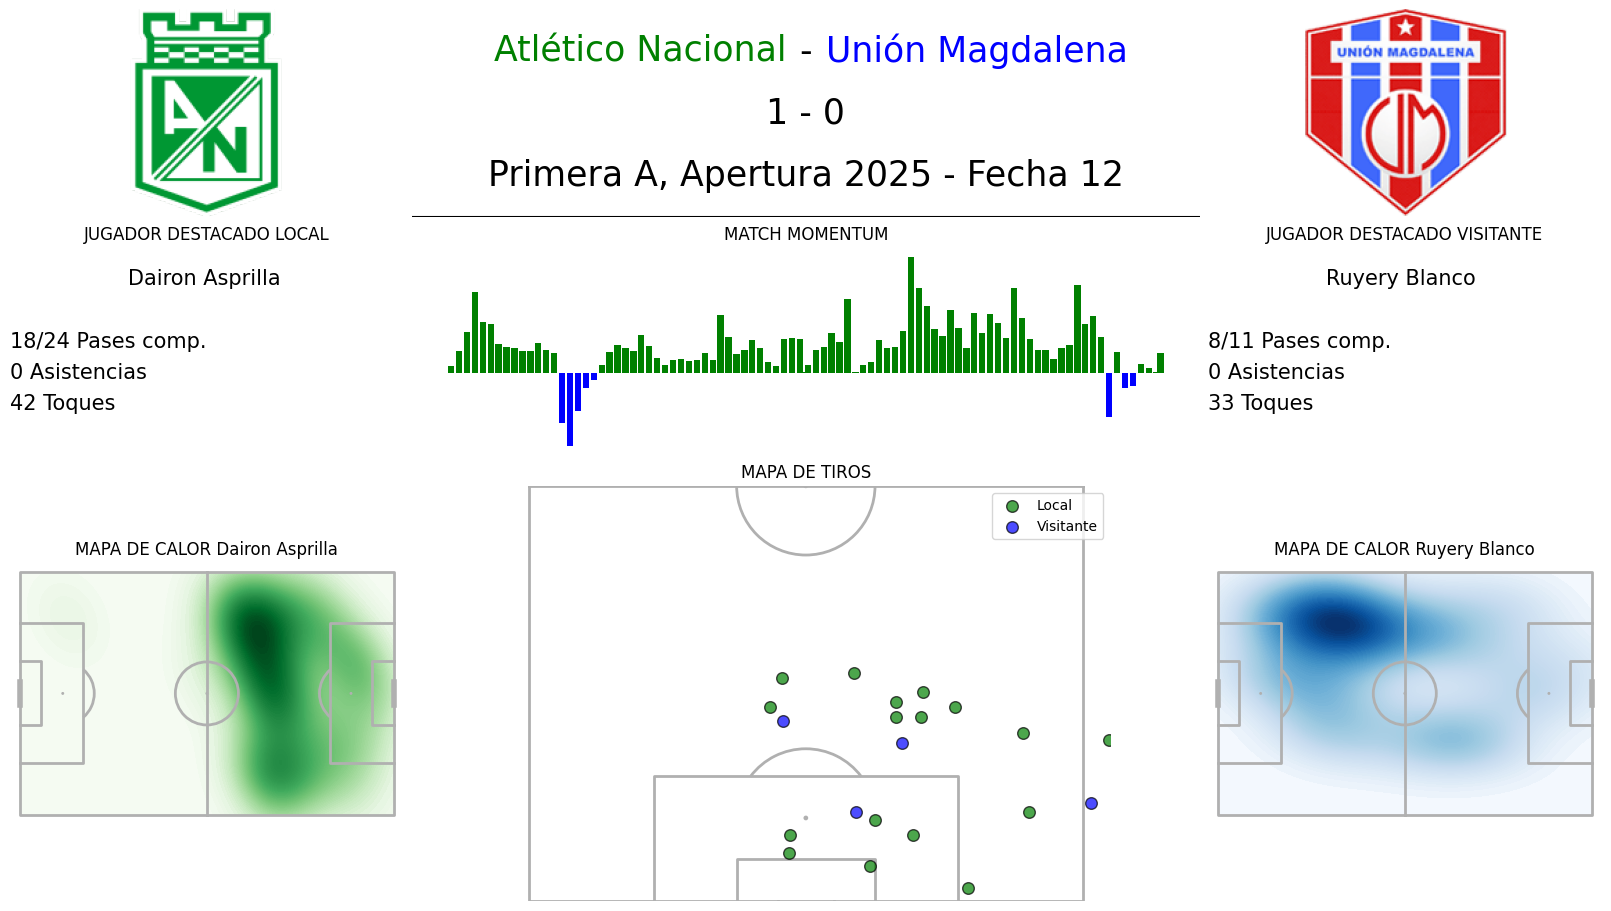

In [ ]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=4,ncols=4)
fig.set_facecolor('white')

#Escudo local
ax1 = fig.add_subplot(gs[0,0:1])
ax1.imshow(imagen1)
sacar_spines(ax1)

#Escudo visitante
ax2 = fig.add_subplot(gs[0,3:4])
ax2.imshow(imagen2)
sacar_spines(ax2)

#datos del partido
ax3 = fig.add_subplot(gs[0,1:3])
ax3.text(.475,.8,f'{nombre_local}', ha='right', va='center', size=25, color=color_loc)
ax3.text(.525,.8,f'{nombre_visit}', ha='left', va='center', size=25, color=color_vis)
ax3.text(.5,.8,'-', ha='center', va='center', size=25)
ax3.text(.5,.5,f'{goleslocal} - {golesvisit}', ha='center', va='center', size=25)
ax3.text(.5,.2,f'{torneo} - Fecha {fecha}', ha='center', va='center', size=25)
ax3.axhline(0, color='black')
sacar_spines(ax3)


lista_estadisticas = ['totalPass', 'accuratePass', 'goalAssist', 'duelWon', 'duelLost', 'keyPass', 'touches', 'totalTackle', 'interceptionWon', 'totalClearance']
#jugador destacado local
ax10 = fig.add_subplot(gs[1:2,:1])
ax10.set_title('JUGADOR DESTACADO LOCAL')
valores_jug_local = df_jug_local[lista_estadisticas].values
ax10.text(.3,.85,f'{jugador_destacado_local}', ha='left', va='center', size=15)
ax10.text(0,.55,f'{int(valores_jug_local[0][1])}/{int(valores_jug_local[0][0])} Pases comp.', ha='left', va='center', size=15)
ax10.text(0,.4,f'{int(valores_jug_local[0][2])} Asistencias', ha='left', va='center', size=15)
ax10.text(0,.25,f'{int(valores_jug_local[0][6])} Toques', ha='left', va='center', size=15)
#ax10.text(0,.1,f'{int(valores_jug_local[0][7])} total entradas', ha='left', va='center', size=15)
#ax10.text(0,.4,f'{int(valores_jug_local[0][7])+int(valores_jug_local[0][8])+int(valores_jug_local[0][9])} Acc. defensivas', ha='left', va='center', size=20)
#ax10.axhline(0, color='black')
sacar_spines(ax10)

#jugador destacado visitante
ax9 = fig.add_subplot(gs[1:2,3:])
ax9.set_title('JUGADOR DESTACADO VISITANTE')
valores_jug_visit = df_jug_visit[lista_estadisticas].values
ax9.text(.3,.85,f'{jugador_destacado_visit}', ha='left', va='center', size=15)
ax9.text(0,.55,f'{int(valores_jug_visit[0][1])}/{int(valores_jug_visit[0][0])} Pases comp.', ha='left', va='center', size=15)
ax9.text(0,.4,f'{int(valores_jug_visit[0][2])} Asistencias', ha='left', va='center', size=15)
ax9.text(0,.25,f'{int(valores_jug_visit[0][6])} Toques', ha='left', va='center', size=15)
#ax9.text(0,.1,f'{int(valores_jug_visit[0][7])} total entradas', ha='left', va='center', size=15)
#ax9.text(0,.4,f'{int(valores_jug_visit[0][9])} Acc. defensivas', ha='left', va='center', size=20)
#ax9.axhline(0, color='black')
sacar_spines(ax9)

# Mapa de calor local
ax5 = fig.add_subplot(gs[2:, :1])
ax5.set_title(f'MAPA DE CALOR {jugador_destacado_local}')
# Dibujar el campo en el subplot correcto (ax5)
pitch_local = Pitch(pitch_type='opta')
pitch_local.draw(ax=ax5)  # Dibuja el campo en ax5
# Graficar el mapa de calor en el subplot correcto (ax5)
pitch_local.kdeplot(
    mapa_calor_jug_loc.x, 
    mapa_calor_jug_loc.y, 
    ax=ax5,
    levels=100,
    shade=True,
    zorder=-1,
    shade_lowest=True,
    cmap='Reds'  # Ajustar colormap si es necesario
)
sacar_spines(ax5)


# Mapa de calor visitante
ax6 = fig.add_subplot(gs[2:,3:])
ax6.set_title(f'MAPA DE CALOR {jugador_destacado_visit}')
# Dibujar el campo en el subplot correcto (ax5)
pitch_visit = Pitch(pitch_type='opta')
pitch_visit.draw(ax=ax6)  # Dibuja el campo en ax5
# Graficar el mapa de calor en el subplot correcto (ax5)
pitch_visit.kdeplot(
    mapa_calor_jug_vis.x, 
    mapa_calor_jug_vis.y, 
    ax=ax6,
    levels=100,
    shade=True,
    zorder=-1,
    shade_lowest=True,
    cmap='Greens'  # Ajustar colormap si es necesario
)
sacar_spines(ax6)

#MATCH MOMENTUM
ax7 = fig.add_subplot(gs[1:2,1:3])
ax7.set_title('MATCH MOMENTUM')
match_momentum_local = match_momentum[match_momentum['value'] > 0]
match_momentum_visit = match_momentum[match_momentum['value'] < 0]
plt.bar(match_momentum_local.minute, match_momentum_local.value, color=color_loc)
plt.bar(match_momentum_visit.minute, match_momentum_visit.value, color=color_vis)
# Líneas verticales punteadas para momentos clave (opcional, por ejemplo, minuto 45, etc.)
ax.axvline(x=45, color='black', linestyle='--', linewidth=1)
ax.axvline(x=15, color='black', linestyle='--', linewidth=1)
ax.axvline(x=75, color='black', linestyle='--', linewidth=1)
# Añadir la línea horizontal en el valor 0
ax.axhline(0, color='black', linewidth=1.2)
sacar_spines(ax7)


#MAPA DE TIROS
ax8 = fig.add_subplot(gs[2:,1:3])
ax8.set_title('MAPA DE TIROS')
#fig, ax8 = plt.subplots(figsize=(8,4))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box'
)
pitch.draw(ax=ax8)
plt.ylim(0, 60)
pitch.scatter(tiros_local.x, tiros_local.y, ax=ax8, color=color_loc, s=70, alpha=0.7, ec='black' ,label='Local')
pitch.scatter(tiros_visit.x, tiros_visit.y, ax=ax8, color=color_vis, s=70, alpha=0.7, ec='black', label='Visitante')
#la leyenda sea arriba a la derecha
plt.legend(loc='upper right')
sacar_spines(ax8)

"""
ax10 = fig.add_subplot(gs[2:,:1])
ax10.set_title('Mayor numero local')
ax10.text(0,.8, f'Más duelos ganados: {nombre_mayores_local[0]} - {valor_mayores_local[0]}', ha='left', va='center')
ax10.text(0,.55, f'Más toques: {nombre_mayores_local[1]} - {int(valor_mayores_local[1])}', ha='left', va='center')
ax10.text(0,.3, f'Más pases claves: {nombre_mayores_local[2]} - {int(valor_mayores_local[2])}', ha='left', va='center')
ax10.text(0,.05, f'Más Goles Esperados: {nombre_mayores_local[3]} - {valor_mayores_local[3]}', ha='left', va='center')
sacar_spines(ax10)
"""



In [ ]:
#color amarillo con colormaps
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight